In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow_gan as tfgan
from importlib import reload
%load_ext tensorboard
tf.config.experimental.list_physical_devices('GPU')

TensorFlow 2.x selected.



[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [0]:
%%bash 
#load sources and train sample
cd /content
git init
git remote add origin https://github.com/unknow112/NSIETE-project-2019.git
git fetch --all 
git checkout master
git status
wget https://static.dthi.eu/datasets/devel_dataset.zip
unzip devel_dataset.zip

In [3]:
!git pull
import flow
import generator
import gan
import discriminator 
reload(discriminator)
reload(generator)
reload(gan)
reload(flow)
from flow import *
from gan import Gan
import pdb
import skimage.io

Already up to date.


In [0]:
gc.collect()
model = train(epoch_count=10, batch_size=20, hr_images=HR_IMAGES, lr_images=LR_IMAGES)

To collect stats above we are using script `main.py` which can be used to collect such output into file. it takes one argument used as filename for weights and it outputs the train details into stdout (which can be captured using linux tool `tee`, for example) 

In [0]:
#if wanted, the model is exported into users google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
model.save_weights('89ee32dec9b217e28d5c28e10cb23fb6911d410c.model')

In [0]:
# copy saved model into google drive to export
%%bash
cp 89ee32dec9b217e28d5c28e10cb23fb6911d410c.model* /content/gdrive

In [0]:
%%bash
wget https://static.dthi.eu/datasets/models/89ee32dec9b217e28d5c28e10cb23fb6911d410c.model.zip
unzip 89ee32dec9b217e28d5c28e10cb23fb6911d410c.model.zip

In [5]:
#@title how to load back existing model
model = Gan()
model.load_weights('89ee32dec9b217e28d5c28e10cb23fb6911d410c.model')

Lines used to show generated image

In [0]:
def denormalize(x):
  return ((x * 127.5) + 127.5).astype(int) % 256

i = load_and_normalize('inputdata/002650.png')

resized = model.predict(np.array([i]))

resized = denormalize(resized[0][0])




/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: test.png is a low contrast image
  warn('%s is a low contrast image' % fname)


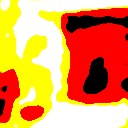

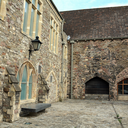

In [35]:
import PIL 
from IPython.display import display

skimage.io.imsave('test.png', resized)
eh =  PIL.Image.open('test.png')
#vankus = PIL.Image.fromarray(resized)
display(eh)
eh =  PIL.Image.open('outputdata/002650.png')
display(eh)